In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import torch
import torch.nn as nn
import torch.tensor as tensor

In [0]:
%matplotlib inline

In [19]:
n =100
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.7978,  1.0000],
        [ 0.2320,  1.0000],
        [-0.1962,  1.0000],
        [ 0.2258,  1.0000],
        [-0.6848,  1.0000]])

In [18]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.8444,  1.0000],
        [ 0.2680,  1.0000],
        [-0.2857,  1.0000],
        [ 0.6429,  1.0000],
        [-0.9612,  1.0000]])

In [20]:
a = tensor([3., 2])
a

tensor([3., 2.])

In [14]:
y = x@a; y

tensor([ 3.9646,  1.0893, -0.8562,  3.4297,  0.9664,  4.2483,  1.5961,  0.3108,
         2.3168,  3.5409,  0.7094,  2.6300, -0.0966,  2.4757,  1.7846,  3.0831,
         2.8638,  4.6884,  1.8048,  0.5024, -0.7247,  2.4296,  2.6610,  2.6872,
         4.5681,  2.9003, -0.1359,  3.7846, -0.3877,  3.2762,  4.8117,  0.3127,
         1.8083,  3.7127,  3.7115,  4.4833,  0.8947,  4.0212,  1.6373,  2.4899,
         2.6665, -0.4152,  3.8035,  0.5966, -0.9216,  3.9331,  0.0493,  4.9208,
         3.0043,  1.3272,  4.9578,  1.4749, -0.1635,  3.7449,  4.3245,  1.8566,
        -0.9383,  1.4273, -0.0928,  3.7791,  2.1045,  4.5744,  4.3922,  2.7223,
         3.8974,  0.8691,  4.7064, -0.5317, -0.3726,  2.0332,  3.6369, -0.3194,
         0.4008, -0.7162,  1.8843,  4.7643,  4.6811,  3.2981,  0.9071,  4.4275,
         2.9272,  2.5607,  2.6671,  3.0023,  1.9776, -0.4248,  0.2268, -0.7346,
         3.3431,  3.1847,  0.4423,  0.7653, -0.9408,  4.4784,  3.9851, -0.0233,
         0.9294, -0.7546,  2.5489,  4.82

In [0]:
y = x@a + torch.rand(n)

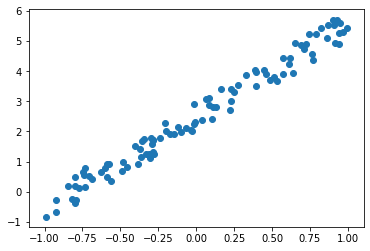

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], y)

In [0]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

In [0]:
a = tensor([-1., 1])

In [0]:
y_hat =x@a

In [31]:
rmse(y_hat, y)

tensor(2.2814)

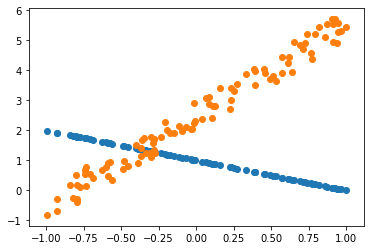

In [34]:
plt.scatter(x[:,0], y_hat)
plt.scatter(x[:,0], y)

In [37]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
lr = 0.1
n_epochs = 100
def update():
  y_hat = x@a
  loss = rmse(y_hat, y)
  if epoch % 10==0: print(loss)
  loss.backward()
  a.sub_(lr * a.grad)

In [51]:
update(lr, n_epochs)

UnboundLocalError: ignored

In [0]:
def update():
  y_hat = x@a
  loss = rmse(y_hat, y)
  if t % 10 == 0: print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [59]:
for epoch in range(n_epochs): update()

tensor(2.2814)


RuntimeError: ignored

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [63]:
lr = 1e-1
for t in range(100): update()

tensor(2.2814)


RuntimeError: ignored